# Regressão Logística & Gradiente Descendente - Grupo de DataScience com Python

<p align="center">
  <img alt="decision_tree" src="https://img.devrant.com/devrant/rant/r_1587555_kpz6c.jpg" alt="drawing" width="400" height="400"/>
</p>

#### Autor: Rafael Barbosa - [LinkedIn](https://www.linkedin.com/in/rafael-barbosa0/) - [Github](https://github.com/barbosarafael)

#### **Nota**: Esse **tutorial, post, notebook ou o que_você_quiser_chamar** possui um viés acadêmico (juro que estou tentando perder ele), então tem coisas que provavelmente passarei despercebido em relação aos conceitos. 

#### **Dica**: Se não entendeu algo, mande mensagem ou dê a famosa googlada.



## 1. Gradiente Descendente

<p align="center">
  <img alt="decision_tree" src="https://miro.medium.com/max/875/1*wsBakfF2Geh1zgY4HJbwFQ.gif" alt="drawing" width="800" height="300"/>

  **Exemplo de gradiente descendente**. Retirado de: https://medium.com/@bruno.dorneles/regress%C3%A3o-linear-com-gradiente-descendente-d3420b0b0ff
</p>

- Assim como o OLS, é um método/algoritmo que busca minimizar uma função custo, só que dessa vez **iterativamente**

- Observando o primeiro gráfico do GIF, a parte mais "funda" da nossa curva 3D é chamado de mínimo global, que é onde possui o valor dos parâmetros que minimiza a função de custo

- Começa com um chute inicial para os parâmetros a se estimar ($ \beta $) e, a partir das iterações, estes valores para os parâmetros vão sendo otimizados

- A diferença entre cada iteração é dada por uma taxa de aprendizado $ \alpha $, também chamada de passos

- Se esse $ \alpha $ for grande, então o método irá iteragir poucas vezes podendo não achar um mínimo global

- Se o $ \alpha $ for um valor pequeno demais, o método irá dar pequenos passos, indicando que haverá um número de altas de iterações



## 2. Regressão Logística

### 2.1. Modelo

**Hair et al. (2009)** nos mostram que a regressão logística é utilizada para **modelar** (buscar entender a relação entre as variáveis) e **prever** dados futuros. É utilizada quando a nossa variável independente (y, target, etc.) é binária (justamente nosso caso, já que queremos prever quem sobreviveu ou não no desastre do Titanic) e possuímos uma ou mais variáveis dependentes (explicativas). Estas variáveis explicativas podem ser de natureza binária, categórica (nominal e ordinal) ou contínuas.

A função logística é dada por

$$ P(x) = \frac{exp(\beta_0 + \sum_{k = 1}^{p}\beta_k X_k)}{1 + exp(\beta_0 + \sum_{k = 1}^{p}\beta_k X_k)} $$ 

E tem a seguinte distribuição:
![](https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/600px-Logistic-curve.svg.png)

- Dado que os Betas (0 e k) serão estimados pelo método da máxima verossimilhança (ver mais neste [material da ESALQ](http://cmq.esalq.usp.br/BIE5781/lib/exe/fetch.php?media=leituras:verossim.pdf));

- $ X_k $ são as variáveis dependentes (features) que irão para o modelo.
 

### 2.2. Modelagem

**Para modelar**, isto é, verificar a relação entre variáveis iremos utilizar a *Odds Ratio*. Ela é a razão entre a chance de um grupo exposto a uma determinada característica pela chance de um grupo que não foi exposto também apresentar a mesma ocorrência. É dada por

$$\text{OR} = \frac{chance_1}{chance_0}$$ 

### Teste de Wald para os coeficientes

Para verificar quais variáveis são significantes para a modelagem e fazer a interpretação a partir da *Odds Ratio*, os coeficientes de cada variável utilizada no modelo precisam ser significativos. As hipóteses para este teste, para cada variável, são:

$ H_0: \beta_k = 0 $

$ H_1: \beta_k \neq 0 $

Neste caso, iremos utilizar o nível de significância de 5%. Podendo chegar a seguinte regra:

> Se o **p-valor** do teste $ \geq $ 0.05: A variável pode ser utilizada para fazermos a modelagem (logo, esta é significante no modelo);

> Se **p-valor** do teste < 0.05: A variável não pode ser utilizada para fazermos a modelagem (logo, esta não é significante no modelo).

## 3. Aplicação: ENEM

**Objetivo**: Verificar se o estudante é **treineiro** (está fazendo a prova para testar seus conhecimentos, sem a necessidade ou objetivo de utilizar a nota do ENEM para entrar na universidade naquele ano em específico) ou não.

### 3.1. Bibliotecas e dados

In [1]:
#--- Bibliotecas

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#--- Configurações adicionais

plt.style.use("seaborn-muted")
%matplotlib inline
pd.set_option("display.max_columns", None)

#--- Importando os dados

dados = pd.read_csv(filepath_or_buffer = "data/train.csv")

In [2]:
dados.head()

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_SABATISTA,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_MACA,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,IN_CERTIFICADO,NO_ENTIDADE_CERTIFICACAO,CO_UF_ENTIDADE_CERTIFICACAO,SG_UF_ENTIDADE_CERTIFICACAO,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027,Q028,Q029,Q030,Q031,Q032,Q033,Q034,Q035,Q036,Q037,Q038,Q039,Q040,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,1,1,4314902.0,Porto Alegre,43.0,RS,1,4,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,4314902,Porto Alegre,43,RS,1,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,436.3,495.4,581.2,399.4,ABACCABDBEDEDEEDDDBBBDAABABECDCCCAAABCBEEABCA,BBEBCAEBCEDBDDEBCACDBCBDABDDCDBEDCEAEABCAADAC,99999DCABCABCBBCADBCBBABAEADBEEBEDAAABAEAECCBB...,AECCCBABDCADDBCBCCADADBBAADEBCEEBABCDDEAABCAA,1,BCADBCEDCCBADBDCADBEBDBEADCCAEACDBEDBCACAEBEE,BCBCCADCCBEDDBEEADBDCECCBBECAEEDDADCDDACAADBA,CEDEACCBEBDBABECABDADEADCEDCBEBBCEBAAEBAAECBBC...,DADCCECBDECADCBACDBCEEABDDAABDBCEADDBECEBAEBC,1.0,120.0,120.0,120.0,80.0,80.0,520.0,D,D,B,B,3,C,A,B,B,B,A,B,A,A,A,A,A,A,B,A,A,C,A,A,A,C,H,E,5.0,5.0,1.0,0.0,0.0,5,5,0,5,5,5,5,5.0,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,3,1,2304707.0,Granja,23.0,CE,2,0,2,1.0,0,23005157.0,2304707.0,Granja,23.0,CE,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2304707,Granja,23,CE,1,1,1,1,b9b06ce8c319a3df2158ea3d0aef0f7d3eecaed7,909237ab0d84688e10c0470e2997348aff585273,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,474.5,544.1,599.0,459.8,EDAAABDABADBCCAEDCDDECABADBEECBBAEEDCABCAABBC,ADCAABAADCEDAACDACEEDACBDCBACEDEDBACAADADABDC,99999ACBACDBDBCEADDAEEADCCEACEEDBECAAAACBECDAC...,AEDACBDECEDAEEAEDDEBDECDCECACADCACACAABDACEAB,1,EBEECADBCABECDDBEADCCABDEABEBCADBADDCCCEDBBCA,DCECBAAADCBBECAEDCEDDACCBDDACEDDBADBCADBCBCEE,CEDEACCBEBDBABECABDADEADCEDCBEBBCEBAAEBAAECBBC...,DADCCECBDECADCBACDBCEEABDDAABDBCEA

### 3.2. Informações do banco de dados

In [3]:
dados.shape

(13730, 167)

### 3.3. Análise exploratória (somente de variáveis interessantes)

In [4]:
#--- Proporção de treineiros no dataset

dados["IN_TREINEIRO"].value_counts(normalize = True).mul(100)

0    87.013838
1    12.986162
Name: IN_TREINEIRO, dtype: float64

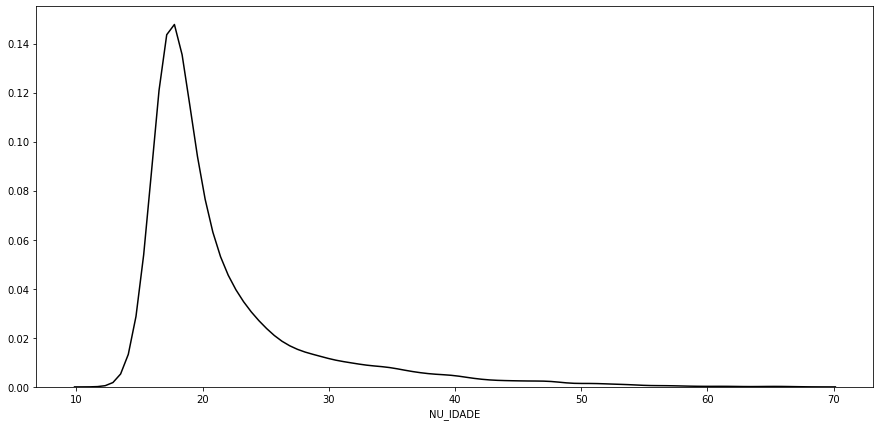

In [5]:
#--- Distribuição da idade dos participantes do ENEM

_ = plt.figure(figsize = [15, 7])
_ = sns.distplot(dados["NU_IDADE"], hist = False, color = "black")

In [6]:
#--- Proporção do gênero dos participantes do ENEM

dados["TP_SEXO"].value_counts(normalize = True).mul(100)

F    61.84268
M    38.15732
Name: TP_SEXO, dtype: float64

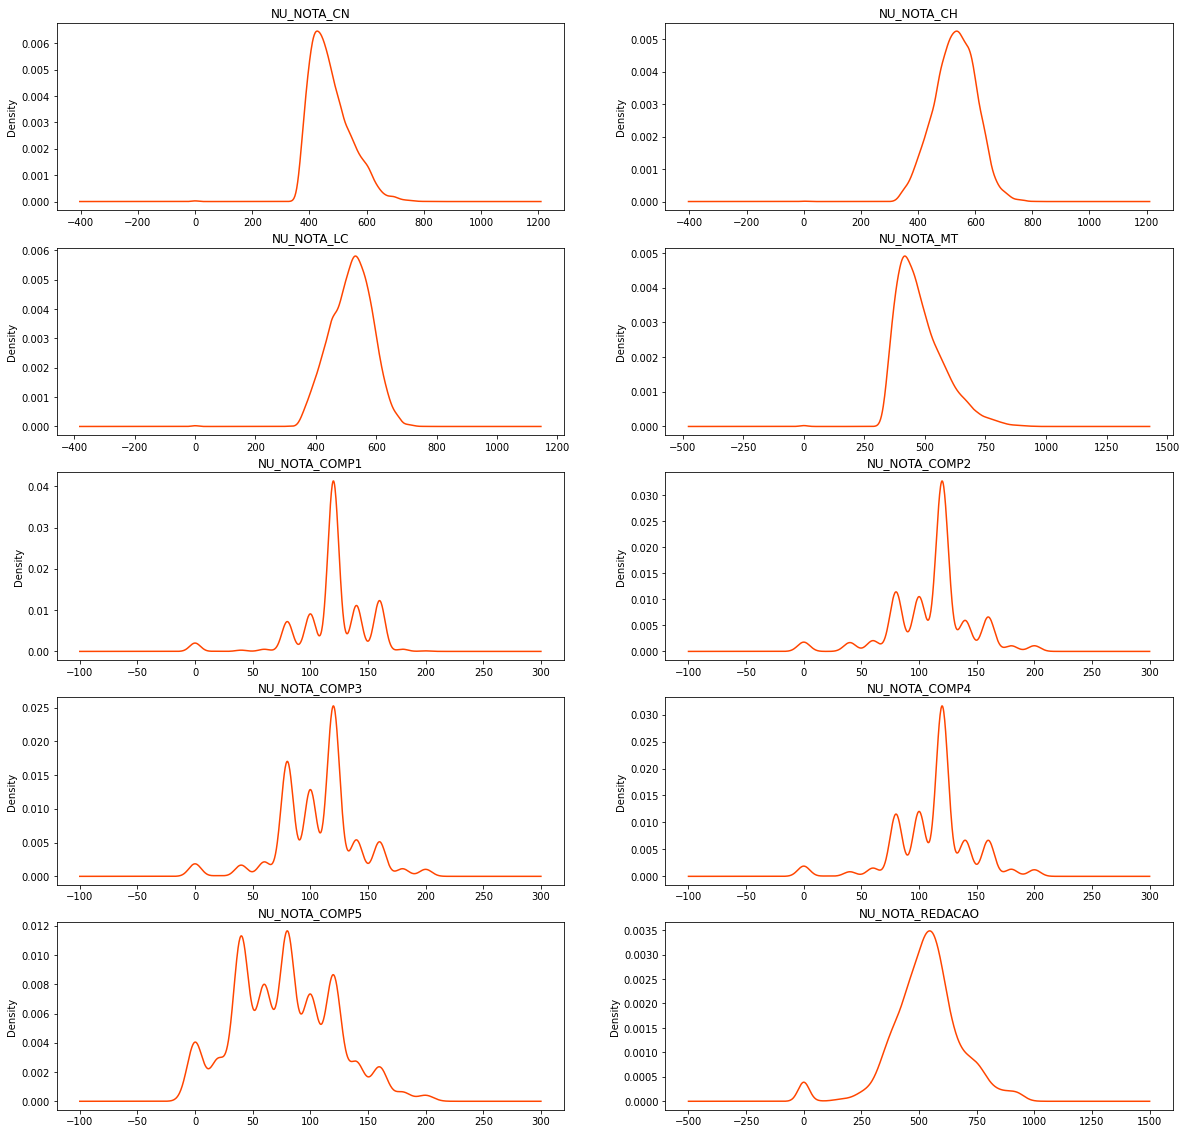

In [7]:
notas = ["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP1", "NU_NOTA_COMP2", "NU_NOTA_COMP3",
         "NU_NOTA_COMP4", "NU_NOTA_COMP5", "NU_NOTA_REDACAO"]

df_notas = dados[notas]

f, axes = plt.subplots(5, 2, figsize = (20, 20), sharex = False)

for ax, column in zip(axes.flat, df_notas.columns):
    df_notas[column].plot(kind = "kde", ax = ax, color = "orangered")
    ax.set_title(column)
    
f.show()

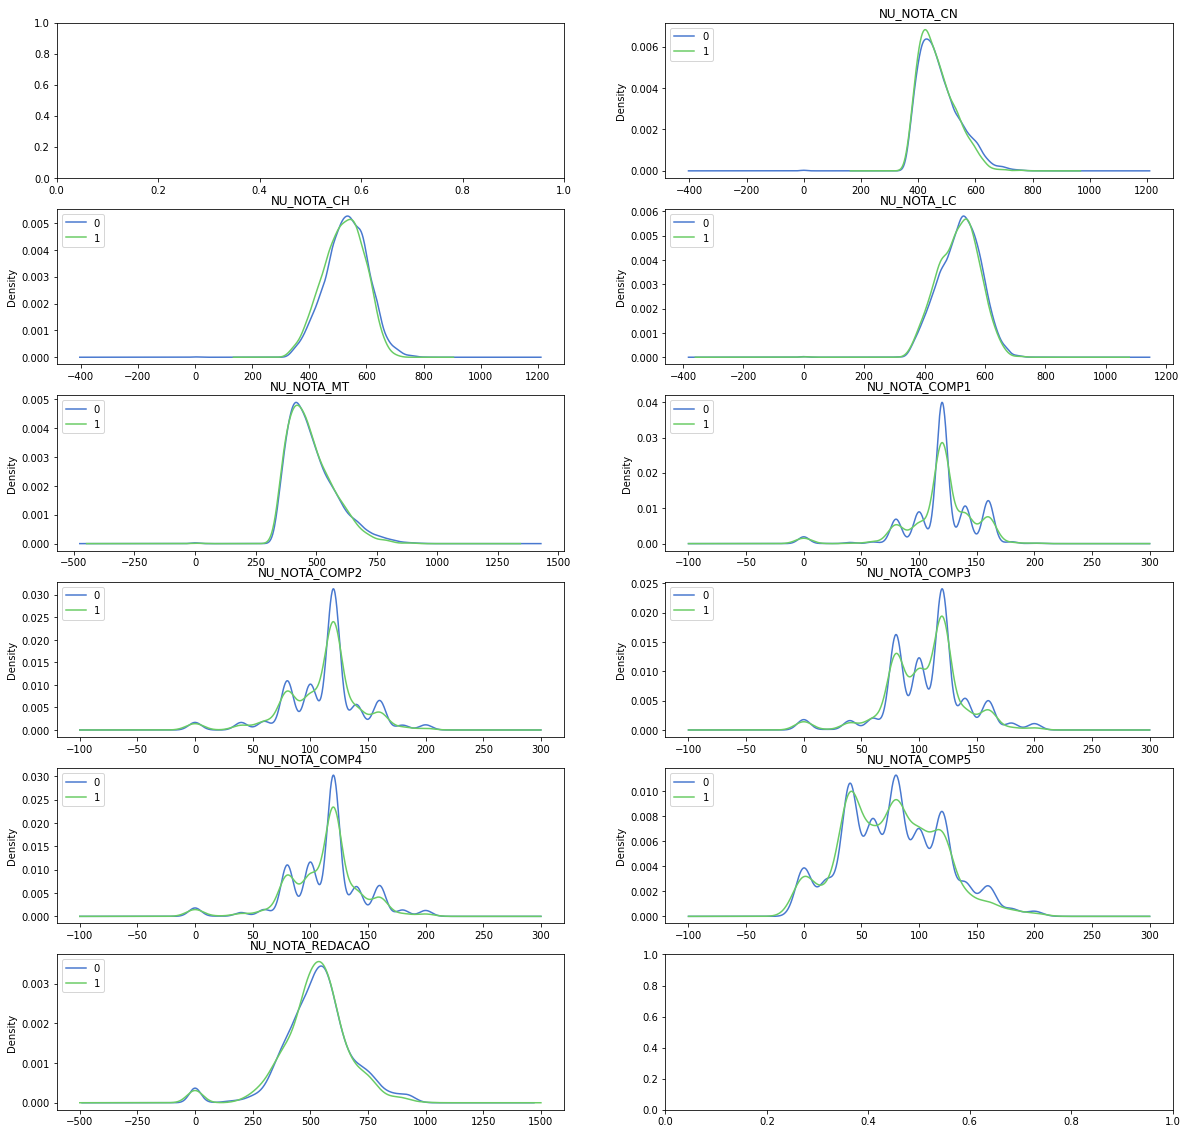

In [8]:
notas1 = ["IN_TREINEIRO", "NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP1", "NU_NOTA_COMP2", "NU_NOTA_COMP3",
         "NU_NOTA_COMP4", "NU_NOTA_COMP5", "NU_NOTA_REDACAO"]

df_notas1 = dados[notas1]

f, axes = plt.subplots(6, 2, figsize = (20, 20), sharex = False)

for ax, column in zip(axes.flat, df_notas1.columns):
    
    if column == "IN_TREINEIRO":
        
        pass
    
    else:   
        
        df_notas1.groupby("IN_TREINEIRO")[column].plot(kind = "kde", ax = ax)
        ax.legend(loc = "upper left")
        ax.set_title(column)

f.show()

### 3.4. Variáveis para o modelo de classificação

In [9]:
fin_dados = dados[["IN_TREINEIRO", "TP_SEXO", "NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP1",
                   "NU_NOTA_COMP2", "NU_NOTA_COMP3", "NU_NOTA_COMP4", "NU_NOTA_COMP5", "NU_NOTA_REDACAO"]]

fin_dados

,IN_TREINEIRO,TP_SEXO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
0,0,M,436.3,495.4,581.2,399.4,120.0,120.0,120.0,80.0,80.0,520.0
1,0,F,474.5,544.1,599.0,459.8,140.0,120.0,120.0,120.0,80.0,580.0
2,0,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
13725,0,M,438.2,419.7,394.5,403.2,120.0,120.0,80.0,80.0,40.0,440.0
13726,0,F,423.8,557.9,533.0,452.4,120.0,120.0,120.0,120.0,80.0,560.0
13727,1,F,460.5,528.9,569.3,398.0,120.0,120.0,120.0,120.0,120.0,600.0
13728,0,M,422.5,621.7,569.0,386.6,100.0,100.0,80.0,80.0,100.0,460.0


### 3.5. Quantidade de valores nulos nas variáveis

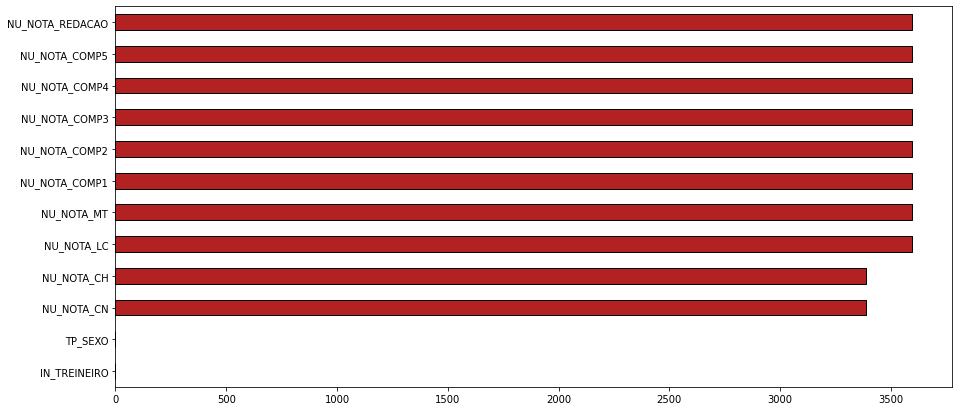

In [10]:
_ = plt.figure(figsize = [15, 7])
_ = fin_dados.isnull().sum().plot(kind = "barh", color = "firebrick", edgecolor = "black")

## 4. Modelo - Regressão Logística

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn import set_config
from sklearn.compose import ColumnTransformer

set_config(display = "diagram")

### 4.1. Treino e teste

In [12]:
x = dados.drop("IN_TREINEIRO", axis = 1)
y = dados["IN_TREINEIRO"]

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.7, stratify = y, random_state = 1234)

### 4.2. Pipeline `sklearn`

In [13]:
log_reg = LogisticRegression()
imput = SimpleImputer(strategy = "median")
scaler = StandardScaler()

In [14]:
num_features = ["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP1", 
                "NU_NOTA_COMP2", "NU_NOTA_COMP3", "NU_NOTA_COMP4", "NU_NOTA_COMP5", "NU_NOTA_REDACAO"]

num_transformer = Pipeline(steps=[
    ("imputer123", imput),
    ("scaler123", scaler)])

preprocessor = ColumnTransformer(transformers = [("num_and_null", num_transformer, num_features)])

model = Pipeline(steps = [("preprocessor", preprocessor), ("classifier", log_reg)])

model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_and_null',
                                                  Pipeline(steps=[('imputer123',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler123',
                                                                   StandardScaler())]),
                                                  ['NU_NOTA_CN', 'NU_NOTA_CH',
                                                   'NU_NOTA_LC', 'NU_NOTA_MT',
                                                   'NU_NOTA_COMP1',
                                                   'NU_NOTA_COMP2',
                                                   'NU_NOTA_COMP3',
                                                   'NU_NOTA_COMP4',
                                                   'NU_NOTA_COMP5',
                                                   'NU_NOTA_REDACAO'])])),
                ('classifier', LogisticRegression())])

In [15]:
model.fit(x_treino, y_treino)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_and_null',
                                                  Pipeline(steps=[('imputer123',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler123',
                                                                   StandardScaler())]),
                                                  ['NU_NOTA_CN', 'NU_NOTA_CH',
                                                   'NU_NOTA_LC', 'NU_NOTA_MT',
                                                   'NU_NOTA_COMP1',
                                                   'NU_NOTA_COMP2',
                                                   'NU_NOTA_COMP3',
                                                   'NU_NOTA_COMP4',
                                                   'NU_NOTA_COMP5',
                                                   'NU_NOTA_REDACAO'])])),
                ('classifier', LogisticRegression())])

In [16]:
model.score(x_teste, y_teste)

0.8701487878472584

In [17]:
cross_val_score(model, x_treino, y_treino, cv = 5, scoring = "accuracy")

array([0.87014563, 0.87014563, 0.87014563, 0.87014563, 0.86998785])

In [18]:
model.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'preprocessor', 'classifier', 'preprocessor__n_jobs', 'preprocessor__remainder', 'preprocessor__sparse_threshold', 'preprocessor__transformer_weights', 'preprocessor__transformers', 'preprocessor__verbose', 'preprocessor__num_and_null', 'preprocessor__num_and_null__memory', 'preprocessor__num_and_null__steps', 'preprocessor__num_and_null__verbose', 'preprocessor__num_and_null__imputer123', 'preprocessor__num_and_null__scaler123', 'preprocessor__num_and_null__imputer123__add_indicator', 'preprocessor__num_and_null__imputer123__copy', 'preprocessor__num_and_null__imputer123__fill_value', 'preprocessor__num_and_null__imputer123__missing_values', 'preprocessor__num_and_null__imputer123__strategy', 'preprocessor__num_and_null__imputer123__verbose', 'preprocessor__num_and_null__scaler123__copy', 'preprocessor__num_and_null__scaler123__with_mean', 'preprocessor__num_and_null__scaler123__with_std', 'classifier__C', 'classifier__class_weight', 'classifie

# Fazer o GridSearch

In [19]:
params = {}
params["preprocessor__num__scaler"] = [None, StandardScaler()]